In [0]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import tensorflow as tf
# Importing the required Keras modules 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
# summarizing loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


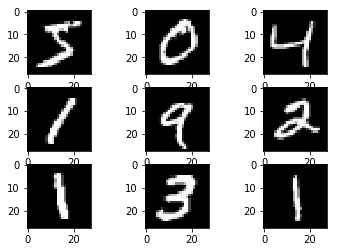

In [24]:
# plotting first few images
for i in range(9):
	# defining subplot
	plt.subplot(330 + 1 + i)
	# plotting raw pixel data
	plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))

In [25]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [27]:
#Compiling and Fitting the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.2185 - acc: 0.9344
Epoch 2/10
60000/60000 [==============================] - 38s 633us/step - loss: 0.0863 - acc: 0.9744
Epoch 3/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0600 - acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.0445 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.0370 - acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.0305 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0257 - acc: 0.9908
Epoch 8/10
60000/60000 [==============================] - 37s 622us/step - loss: 0.0234 - acc: 0.9922
Epoch 9/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.0205 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 36s 596us/step - loss: 

In [28]:
#Evaluating the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 166us/step


[0.08123308802539977, 0.9824]

0


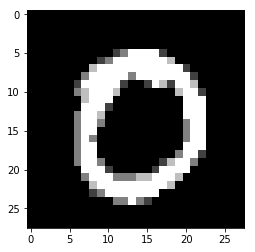

In [31]:
#Checking for a paticular image
image_index = 3445
plt.imshow(x_test[image_index].reshape(28, 28),cmap=pyplot.get_cmap('gray'))
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())